In [4]:
### Limpieza Global temperature

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Importamos el DF
data_frame = pd.read_csv(r"C:\Users\Peps\Desktop\Proyectos Data Science\Global_temperature.csv", sep=';')
data_frame

,Land-Ocean,Temperature,(C)
0,Year,No_Smoothing,Lowess(5)
1,1880,-0.17,-0.10
2,1881,-0.09,-0.13
3,1882,-0.11,-0.17
4,1883,-0.18,-0.21
...,...,...,...
141,2020,1.01,0.97
142,2021,0.85,1.03
143,2022,0.89,1.08
144,2023,1.17,1.14


In [7]:
#Cambiamos nombre de las columnas
df = data_frame.rename(columns={'Land-Ocean' : 'Year', 'Temperature' : 'Annual_Anomaly_C', '(C)' : 'Annual_Anomaly_Lowess_C'})
df.head()

,Year,Annual_Anomaly_C,Annual_Anomaly_Lowess_C
0,Year,No_Smoothing,Lowess(5)
1,1880,-0.17,-0.10
2,1881,-0.09,-0.13
3,1882,-0.11,-0.17
4,1883,-0.18,-0.21


In [8]:
#Eliminamos columna con informacion extra
df = df.drop(0)
df

,Year,Annual_Anomaly_C,Annual_Anomaly_Lowess_C
1,1880,-0.17,-0.10
2,1881,-0.09,-0.13
3,1882,-0.11,-0.17
4,1883,-0.18,-0.21
5,1884,-0.29,-0.24
...,...,...,...
141,2020,1.01,0.97
142,2021,0.85,1.03
143,2022,0.89,1.08
144,2023,1.17,1.14


In [9]:
#Comprobamos el tipo de datos y si hay datos nulos
df.info()
print("Null values:\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 1 to 145
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     145 non-null    object
 1   Annual_Anomaly_C         145 non-null    object
 2   Annual_Anomaly_Lowess_C  145 non-null    object
dtypes: object(3)
memory usage: 3.5+ KB
Null values:
 Year                       0
Annual_Anomaly_C           0
Annual_Anomaly_Lowess_C    0
dtype: int64


In [10]:
# Cambiamos al tipo de datos apropiado
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Annual_Anomaly_C'] = pd.to_numeric(df['Annual_Anomaly_C'], errors = 'coerce')
df['Annual_Anomaly_Lowess_C'] = pd.to_numeric(df['Annual_Anomaly_Lowess_C'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 1 to 145
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     145 non-null    int64  
 1   Annual_Anomaly_C         145 non-null    float64
 2   Annual_Anomaly_Lowess_C  145 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


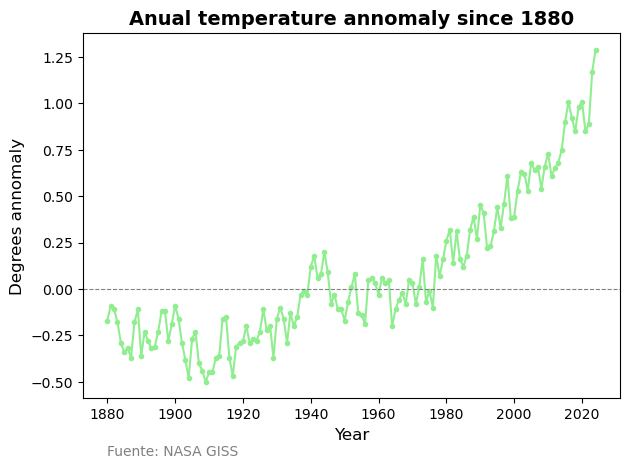

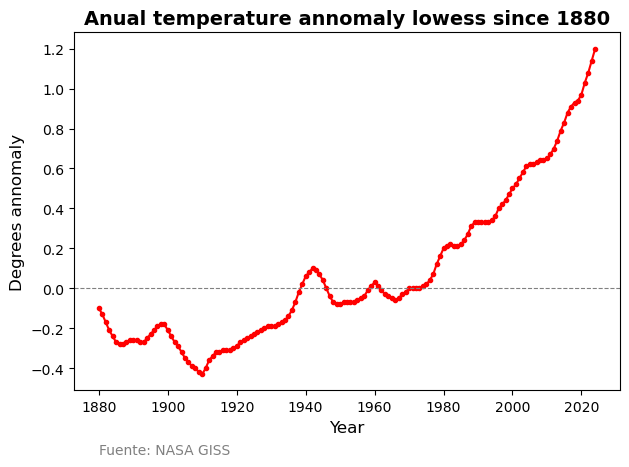

In [11]:
#Grafica general sin suavizado de temperaturas
plt.plot(df['Year'], df['Annual_Anomaly_C'], marker='o', linestyle='-', markersize=3, color='lightgreen', label='Anomalía de Temperatura Anual Bruta (°C)')
plt.title ('Anual temperature annomaly since 1880', fontsize = 14, fontweight = 'bold')
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Degrees annomaly', fontsize = 12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.text(df['Year'].min(), df['Annual_Anomaly_C'].min() - 0.4,'Fuente: NASA GISS', fontsize=10, color='gray')
plt.tight_layout() 
plt.show()

#Grafico general con suavizado
plt.plot(df['Year'], df['Annual_Anomaly_Lowess_C'], marker='o', linestyle='-', markersize=3, color='red', label='Anomalía de Temperatura Anual Suavizada (°C)')
plt.title ('Anual temperature annomaly lowess since 1880', fontsize = 14, fontweight = 'bold')
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Degrees annomaly', fontsize = 12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.text(df['Year'].min(), df['Annual_Anomaly_Lowess_C'].min() - 0.4,'Fuente: NASA GISS', fontsize=10, color='gray')
plt.tight_layout() 
plt.show()


In [12]:
df_decade = df
df_decade['Decade'] = (df_decade['Year']//10*10) # Truncamos los datos de los años a las decenas y las multiplicamos por 10 para obtener las datos en "decadas"
df_decade

,Year,Annual_Anomaly_C,Annual_Anomaly_Lowess_C,Decade
1,1880,-0.17,-0.10,1880
2,1881,-0.09,-0.13,1880
3,1882,-0.11,-0.17,1880
4,1883,-0.18,-0.21,1880
5,1884,-0.29,-0.24,1880
...,...,...,...,...
141,2020,1.01,0.97,2020
142,2021,0.85,1.03,2020
143,2022,0.89,1.08,2020
144,2023,1.17,1.14,2020


In [13]:
# Agrupamos por 'Decade' y usamos .agg() con un diccionario.
# La clave del diccionario es la columna sobre la que queremos agregar.
# El valor es una lista de las funciones de agregación que queremos aplicar.
df_decade_summary = df_decade.groupby('Decade').agg({
    'Annual_Anomaly_C': ['mean', 'std']
}).reset_index() # .reset_index() convierte 'Decade' de nuevo en una columna normal.
df_decade_summary.columns = ['Decade','mean_anomaly','std_anomaly']
df_decade_summary

df_decade_summary_lowess = df_decade.groupby('Decade').agg({
    'Annual_Anomaly_Lowess_C': ['mean', 'std']
}).reset_index() # .reset_index() convierte 'Decade' de nuevo en una columna normal.
df_decade_summary_lowess.columns = ['Decade','mean_anomaly_low','std_anomaly_low']
df_decade_summary_lowess

,Decade,mean_anomaly_low,std_anomaly_low
0,1880,-0.221,0.066072
1,1890,-0.230,0.037118
2,1900,-0.326,0.071678
3,1910,-0.340,0.043716
4,1920,-0.236,0.032042
5,1930,-0.121,0.074603
6,1940,0.025,0.067700
7,1950,-0.051,0.029609
8,1960,-0.025,0.028382
9,1970,0.042,0.057116


<function matplotlib.pyplot.show(close=None, block=None)>

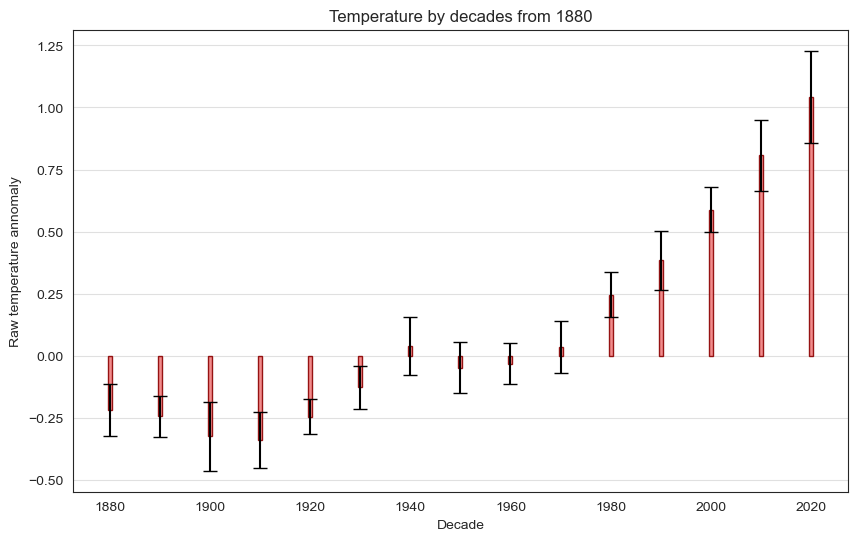

In [14]:
sns.set_style("white")
plt.rcParams['figure.figsize'] = (16, 8) # Aumentamos el tamaño para mejor legibilidad
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(10, 6))
plt.bar(df_decade_summary['Decade'], df_decade_summary['mean_anomaly'],
        yerr=df_decade_summary['std_anomaly'],   # La desviación estándar como barras de error
        capsize=5,                               # Tamaño de los "bigotes" de la barra de error
        color='lightcoral',                      # Color de las barras
        edgecolor='darkred',                     # Color del borde de las barras
        alpha=0.9,                               # Transparencia
        label='Anomalía Promedio por Década (°C) con Desviación Estándar')
plt.title('Temperature by decades from 1880')
plt.xlabel('Decade')
plt.ylabel('Raw temperature annomaly')
plt.grid(axis = 'y', alpha=0.6)
plt.show

In [15]:
#Cargamos el siguiente DF, en este caso niveles de CO2 emitido para cada pais por año
df_co2 = pd.read_csv(r"C:\Users\Peps\Desktop\Proyectos Data Science\per-capita-co-emissions.csv", sep=',')
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [16]:
#Comprobamos los tipos de datos y los nulls
df_co2.info()
print("Null values:\n",df_co2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             26182 non-null  object 
 1   Year                               26182 non-null  int64  
 2   Annual CO₂ emissions (per capita)  26182 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 613.8+ KB
Null values:
 Entity                               0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64


In [17]:
# Convertir la columna 'entity' a tipo 'string', que es la unica erronea
df_co2['Entity'] = df_co2['Entity'].astype('string')
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             26182 non-null  string 
 1   Year                               26182 non-null  int64  
 2   Annual CO₂ emissions (per capita)  26182 non-null  float64
dtypes: float64(1), int64(1), string(1)
memory usage: 613.8 KB


In [18]:
# Filtrar para obtener solo los datos a nivel mundial
df_co2_world = df_co2[df_co2['Entity'] == 'World'].copy()
print(df_co2_world.columns)

Index(['Entity', 'Year', 'Annual CO₂ emissions (per capita)'], dtype='object')


In [19]:
#Creamos una nueva columna con los datos para cada década
df_co2_world['Decade'] = (df_co2_world['Year']//10*10)
df_co2_world

,Entity,Year,Annual CO₂ emissions (per capita),Decade
25819,World,1750,0.012354,1750
25820,World,1760,0.013339,1760
25821,World,1770,0.015819,1770
25822,World,1780,0.017625,1780
25823,World,1790,0.021648,1790
...,...,...,...,...
25908,World,2019,4.750081,2010
25909,World,2020,4.453724,2020
25910,World,2021,4.650446,2020
25911,World,2022,4.649288,2020


<function matplotlib.pyplot.show(close=None, block=None)>

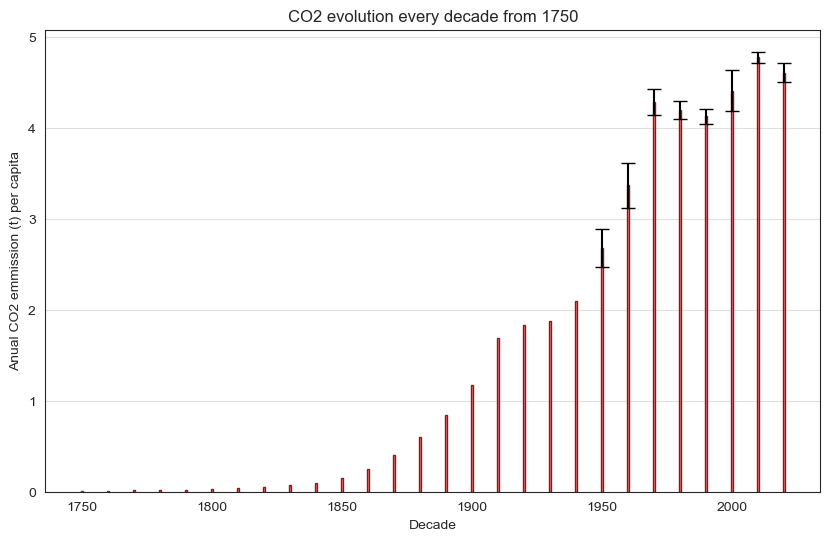

In [20]:
#Para comparar con el aumento de temperatura anual vamos a hacer como antes y utilizaremos la media para cada década.
df_co2_summary = df_co2_world.groupby('Decade').agg({
    'Annual CO₂ emissions (per capita)': ['mean', 'std']
}).reset_index() 
df_co2_summary.columns = ['Decade','mean_co2','std_co2']
df_co2_summary

sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.bar(df_co2_summary['Decade'], df_co2_summary['mean_co2'],
        yerr=df_co2_summary['std_co2'],   #Dsviación estándar 
        capsize=5,                              
        color='lightcoral',                     
        edgecolor='darkred',                     
        alpha=0.9,                               
        label='Co2')
plt.title('CO2 evolution every decade from 1750')
plt.xlabel('Decade')
plt.ylabel('Anual CO2 emmission (t) per capita')
plt.grid(axis = 'y', alpha=0.6)
plt.show

In [21]:
# Da problemas cargarlo como hariasmo normalmente, usamos un try para manejar errores

import pandas as pd
import numpy as np

# Ruta al archivo
file_path_sea_level = r"C:\Users\Peps\Desktop\Proyectos Data Science\Sea_level.txt"

# Lista para almacenar los datos parseados
data_rows = []

# Número de líneas de encabezado a saltar
skip_lines = 18

# Índices de las columnas de interés (0-indexado)
year_col_idx = 2
gmsl_col_idx = 11

try:
    with open(file_path_sea_level, 'r') as f:
        for i, line in enumerate(f):
            if i < skip_lines:
                continue

            line = line.strip() # Eliminar espacios al principio/final
            if not line: # Saltar líneas vacías
                continue

            parts = line.split() # Divide por cualquier secuencia de espacios

            if len(parts) > max(year_col_idx, gmsl_col_idx):
                try:
                    year = float(parts[year_col_idx])
                    gmsl = float(parts[gmsl_col_idx])
                    data_rows.append({'Year_Decimal': year, 'GMSL_Anomaly_mm': gmsl})
                except ValueError:
                    print(f"Advertencia: No se pudo parsear la línea {i+1} (tipo de dato): '{line}'")
            else:
                print(f"Advertencia: La línea {i+1} tiene menos columnas de las esperadas: '{line}'")

    df_sea_level = pd.DataFrame(data_rows)

    print("DataFrame del Nivel del Mar cargado y columnas renombradas (método manual).")
    print("\n--- Primeras 5 filas del DataFrame del Nivel del Mar ---")
    print(df_sea_level.head())
    print("\n--- Información del DataFrame del Nivel del Mar ---")
    print(df_sea_level.info())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta: {file_path_sea_level}")
    print("Asegúrate de que la ruta y el nombre del archivo sean correctos.")
except Exception as e:
    print(f"Ocurrió un error general inesperado: {e}")

Advertencia: La línea 19 tiene menos columnas de las esperadas: 'HDR'
Advertencia: No se pudo parsear la línea 20 (tipo de dato): 'HDR For information on how the data were generate please refer to:'
Advertencia: No se pudo parsear la línea 21 (tipo de dato): 'HDR Beckley, B. D., Callahan, P. S., Hancock, D. W., Mitchum, G. T., & Ray, R. D. (2017). On the 'cal-mode''
Advertencia: No se pudo parsear la línea 22 (tipo de dato): 'HDR correction to TOPEX satellite altimetry and its effect on the global mean sea level time series.'
Advertencia: La línea 23 tiene menos columnas de las esperadas: 'HDR Journal of Geophysical Research: Oceans, 122. https://doi.org/10.1002/2017JC013090'
Advertencia: La línea 24 tiene menos columnas de las esperadas: 'HDR'
Advertencia: No se pudo parsear la línea 25 (tipo de dato): 'HDR Beckley, B.D.,  N. P. Zelensky, S. A. Holmes, F. G. Lemoine, R. D. Ray, G. T. Mitchum, S. D. Desai & S. T. Brown, Assessment'
Advertencia: No se pudo parsear la línea 26 (tipo de d

In [22]:
#Cambiamos el nombre a las columnas y limpiamos la columna Year para dejar solo el año
df_sea_level = df_sea_level.rename(columns = {'Year_Decimal' : 'Year', 'GMSL_Anomaly_mm' : 'GMSL Anomaly'})
df_sea_level['Year'] = df_sea_level['Year'].astype(int)
df_sea_level

,Year,GMSL Anomaly
0,1993,-37.64
1,1993,-38.53
2,1993,-38.16
3,1993,-38.12
4,1993,-36.96
...,...,...
1178,2025,72.50
1179,2025,72.54
1180,2025,72.66
1181,2025,72.81


In [23]:
# Creamos como antes los datos para cada década
df_sea_level['Decade'] = (df_sea_level['Year']//10*10)
df_sea_level

,Year,GMSL Anomaly,Decade
0,1993,-37.64,1990
1,1993,-38.53,1990
2,1993,-38.16,1990
3,1993,-38.12,1990
4,1993,-36.96,1990
...,...,...,...
1178,2025,72.50,2020
1179,2025,72.54,2020
1180,2025,72.66,2020
1181,2025,72.81,2020


In [24]:
df_sea_summary = df_sea_level.groupby('Decade').agg({
    'GMSL Anomaly' : ['mean', 'std']
}).reset_index()
df_sea_summary.columns = ['Decade','mean_GMSL','std_GMSL']
df_sea_summary

,Decade,mean_GMSL,std_GMSL
0,1990,-23.846202,5.393996
1,2000,0.069510,7.562312
2,2010,33.332764,13.467815
3,2020,63.143968,7.280799


<function matplotlib.pyplot.show(close=None, block=None)>

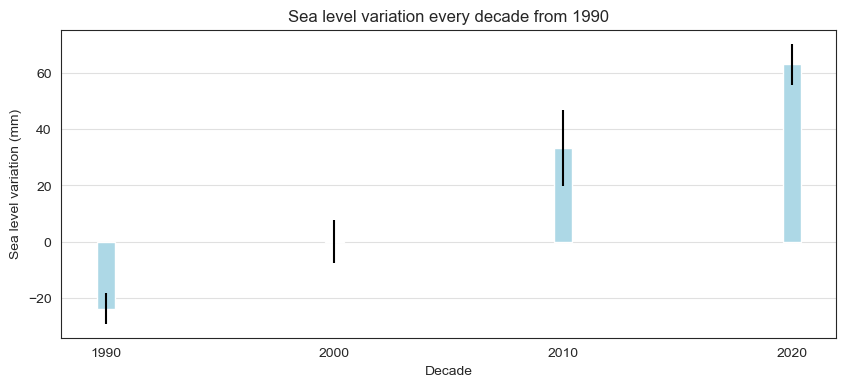

In [25]:
#Graficamos los datos para cada década
sns.set_style("white")
plt.figure(figsize=(10, 4))
plt.bar(df_sea_summary['Decade'], df_sea_summary['mean_GMSL'],
       yerr = df_sea_summary['std_GMSL'],
       color='lightblue',
       )
plt.grid(axis = 'y', alpha = 0.6)
plt.title('Sea level variation every decade from 1990')
plt.xlabel('Decade')
plt.xticks(df_sea_summary['Decade'])
plt.ylabel('Sea level variation (mm)')
plt.show

In [26]:
# Con todos los df limpios y graficados vamos a hacer un test de correlacion de Pearson para ver si la correlacion entre los datos es fuerte o no:
# Unificamos los DF.
df_comb_1 = pd.merge(df_co2_summary, df_decade_summary_lowess, on='Decade', how='inner')
df_comb_2 = pd.merge(df_comb_1, df_sea_summary, on='Decade', how='inner')
df_comb_2

,Decade,mean_co2,std_co2,mean_anomaly_low,std_anomaly_low,mean_GMSL,std_GMSL
0,1990,4.124224,0.084083,0.375,0.053177,-23.846202,5.393996
1,2000,4.409115,0.223157,0.591,0.051088,0.069510,7.562312
2,2010,4.774079,0.061477,0.804,0.109970,33.332764,13.467815
3,2020,4.605962,0.101954,1.084,0.090167,63.143968,7.280799


In [27]:
# Hacemos el test de Pearson
inter_columns = ['mean_co2', 'mean_anomaly_low', 'mean_GMSL']
matriz_correlacion = df_comb_2[inter_columns].corr(method='pearson')

print("Matriz de Correlación de Pearson:", matriz_correlacion)

Matriz de Correlación de Pearson:                   mean_co2  mean_anomaly_low  mean_GMSL
mean_co2          1.000000          0.797897   0.826604
mean_anomaly_low  0.797897          1.000000   0.997183
mean_GMSL         0.826604          0.997183   1.000000


In [28]:
# Como solo tenemos 4 décadas para el nivel del mar el test de pearson pierde potencia, vamos a hacer la correlacion para cada año
# creamos un nuevo df del nivel del mar con la media para cada año
df_sea_level_mean = df_sea_level.groupby('Year').mean()
df_sea_level_std = df_sea_level.groupby('Year').std()
df_sea_level_2 = pd.merge(df_sea_level_mean,df_sea_level_std, on='Year', how='inner')
df_sea_level_2 = df_sea_level_2.rename(columns = {'Year' : 'Year', 'GMSL Anomaly_x' : 'GMSL mean', 'GMSL Anomaly_y' : 'GMSL std'})
df_sea_level_2

,GMSL mean,Decade_x,GMSL std,Decade_y
Year,,,,
1993,-32.842973,1990.0,2.291466,0.0
1994,-28.405135,1990.0,1.491740,0.0
1995,-24.041081,1990.0,0.818008,0.0
1996,-23.594167,1990.0,1.225991,0.0
1997,-19.008108,1990.0,3.613036,0.0
1998,-20.484054,1990.0,3.062241,0.0
1999,-18.541081,1990.0,2.532579,0.0
2000,-13.377297,2000.0,1.999031,0.0
2001,-7.281351,2000.0,1.756729,0.0


In [29]:
# Juntamos los df por año

df_comb_1 = pd.merge(df_co2_world, df_decade ,on='Year', how='inner')
df_comb = pd.merge(df_comb_1, df_sea_level_2, on='Year', how='inner')
df_comb

,Entity,Year,Annual CO₂ emissions (per capita),Decade_x_x,Annual_Anomaly_C,Annual_Anomaly_Lowess_C,Decade_y_x,GMSL mean,Decade_x_y,GMSL std,Decade_y_y
0,World,1993,4.069678,1990,0.23,0.33,1990,-32.842973,1990.0,2.291466,0.0
1,World,1994,4.051227,1990,0.31,0.34,1990,-28.405135,1990.0,1.491740,0.0
2,World,1995,4.086227,1990,0.44,0.36,1990,-24.041081,1990.0,0.818008,0.0
3,World,1996,4.152334,1990,0.33,0.40,1990,-23.594167,1990.0,1.225991,0.0
4,World,1997,4.118613,1990,0.46,0.42,1990,-19.008108,1990.0,3.613036,0.0
5,World,1998,4.045865,1990,0.61,0.44,1990,-20.484054,1990.0,3.062241,0.0
6,World,1999,4.081738,1990,0.38,0.47,1990,-18.541081,1990.0,2.532579,0.0
7,World,2000,4.133470,2000,0.39,0.50,2000,-13.377297,2000.0,1.999031,0.0
8,World,2001,4.109761,2000,0.53,0.52,2000,-7.281351,2000.0,1.756729,0.0
9,World,2002,4.146101,2000,0.63,0.55,2000,-5.628889,2000.0,0.779666,0.0


In [30]:
# Volvemos a realizar el test de Pearson
inter_columns = ['Annual CO₂ emissions (per capita)', 'Annual_Anomaly_Lowess_C', 'GMSL mean']
matriz_correlacion = df_comb[inter_columns].corr(method='pearson')

print("Matriz de Correlación de Pearson:", matriz_correlacion)

Matriz de Correlación de Pearson:                                    Annual CO₂ emissions (per capita)  \
Annual CO₂ emissions (per capita)                           1.000000   
Annual_Anomaly_Lowess_C                                     0.743579   
GMSL mean                                                   0.778210   

                                   Annual_Anomaly_Lowess_C  GMSL mean  
Annual CO₂ emissions (per capita)                 0.743579    0.77821  
Annual_Anomaly_Lowess_C                           1.000000    0.99186  
GMSL mean                                         0.991860    1.00000  


C:\Users\Peps\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()


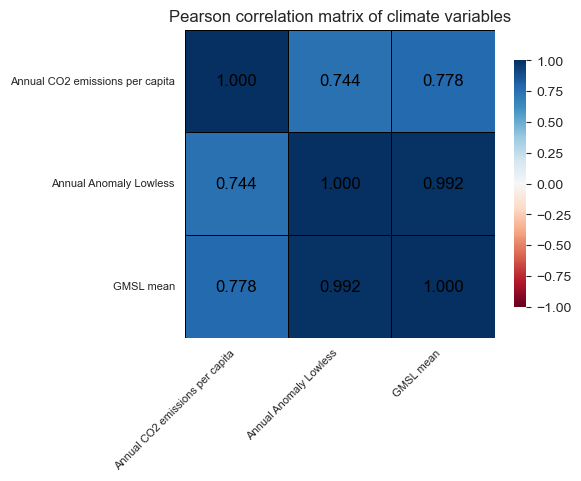

In [31]:
plt.figure(figsize=(5, 4)) # Aumentamos el tamaño de la figura

# Creamos el heatmap con mejoras
sns.heatmap(
    matriz_correlacion,
    annot=True,          # Muestra los valores de correlación en las celdas
    cmap='RdBu',         # Mapa de color: Rojo para negativos, Azul para positivos, Blanco para 0
    fmt=".3f",           # Formato de los números con 3 decimales
    linewidths=.5,       # Líneas para separar las celdas
    linecolor='black',   
    cbar_kws={'shrink': .8}, # Ajusta el tamaño de la barra de color
    vmin=-1,             # Establece el valor mínimo de la escala de color a -1
    vmax=1,              # Establece el valor máximo de la escala de color a 1
    annot_kws={"size": 12, "color": "black"} 
)
new_tags = [
    'Annual CO2 emissions per capita',
    'Annual Anomaly Lowless',
    'GMSL mean'
]
plt.title('Pearson correlation matrix of climate variables', fontsize=12) # Título más grandeplt.xticks(fontsize=8,rotation=45, ha='right') # Tamaño de fuente para las etiquetas del eje X
plt.yticks(ticks=np.arange(len(new_tags)) + 0.5, # Posiciona los ticks en el centro de las celdas
           labels=new_tags,
           fontsize=8, rotation=0, ha='right') # Tamaño de fuente para las etiquetas del eje Y y rotación
plt.xticks(ticks=np.arange(len(new_tags)) + 0.5, # Posiciona los ticks en el centro de las celdas
           labels=new_tags,
           fontsize=8, rotation=45, ha='right')

plt.show()

In [32]:
#Realicemos un test de significancia para Pearson:
from scipy.stats import pearsonr

co2_data = df_comb['Annual CO₂ emissions (per capita)'] # O 'mean_co2'
temp_data = df_comb['Annual_Anomaly_Lowess_C']         # O 'mean_anomaly_low'
gmsl_data = df_comb['GMSL mean']                       # O 'mean_GMSL'

# Correlación CO2 vs Temperatura
corr_co2_temp, p_value_co2_temp = pearsonr(co2_data, temp_data)
print(f"Correlación CO2 vs Temp: r={corr_co2_temp:.3f}, p-value={p_value_co2_temp:.6f}")

# Correlación CO2 vs GMSL
corr_co2_gmsl, p_value_co2_gmsl = pearsonr(co2_data, gmsl_data)
print(f"Correlación CO2 vs GMSL: r={corr_co2_gmsl:.3f}, p-value={p_value_co2_gmsl:.6f}")

# Correlación Temperatura vs GMSL
corr_temp_gmsl, p_value_temp_gmsl = pearsonr(temp_data, gmsl_data)
print(f"Correlación Temp vs GMSL: r={corr_temp_gmsl:.3f}, p-value={p_value_temp_gmsl:.6f}")

Correlación CO2 vs Temp: r=0.744, p-value=0.000002
Correlación CO2 vs GMSL: r=0.778, p-value=0.000000
Correlación Temp vs GMSL: r=0.992, p-value=0.000000


In [33]:
# Vemos que el p-valor para las correlaciones es muy pequeño, mucho menor a 0.05, por lo que las correlaciones son muy significativas, no fruto del azar.
# Vamos a intentar predecir algunos valores mediante ML. Importamos las librerias necesarias para ML
# comenzaremos con un modelo sencillo de regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definimos las variables predictoras y las que queremos predecir:
X = df_comb[['Annual CO₂ emissions (per capita)', 'Year']]
y = df_comb['Annual_Anomaly_Lowess_C']

# Definimos tambien el porcentaje para entrenar el modelo (normalmente 80%) y en este caso vamos a hacerlo por año en vez de aleatoriamente,
# ya que trabajamos con series temporales y tiene una dependencia del tiempo. 
split_point = int(len(df_comb) * 0.8) #usa el 80% del total de filas

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

print(f"Número de años para entrenamiento: {len(X_train)}")
print(f"Número de años para prueba: {len(X_test)}")

Número de años para entrenamiento: 24
Número de años para prueba: 7


In [34]:
# Entrenamos el modelo
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Evaluamos el modelo 
y_pred_simple = model_simple.predict(X_test)

rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
r2_simple = r2_score(y_test, y_pred_simple)

print(f"\n--- Evaluación del Modelo de Regresión Lineal ---")
print(f"RMSE (Error Cuadrático Medio): {rmse_simple:.3f}")
print(f"R-cuadrado: {r2_simple:.3f}")
print(f"Coeficiente para CO2 per cápita: {model_simple.coef_[0]:.3f}")
print(f"Coeficiente para Año: {model_simple.coef_[1]:.3f}")
print(f"Intercepto: {model_simple.intercept_:.3f}")


--- Evaluación del Modelo de Regresión Lineal ---
RMSE (Error Cuadrático Medio): 0.046
R-cuadrado: 0.669
Coeficiente para CO2 per cápita: -0.153
Coeficiente para Año: 0.027
Intercepto: -53.727


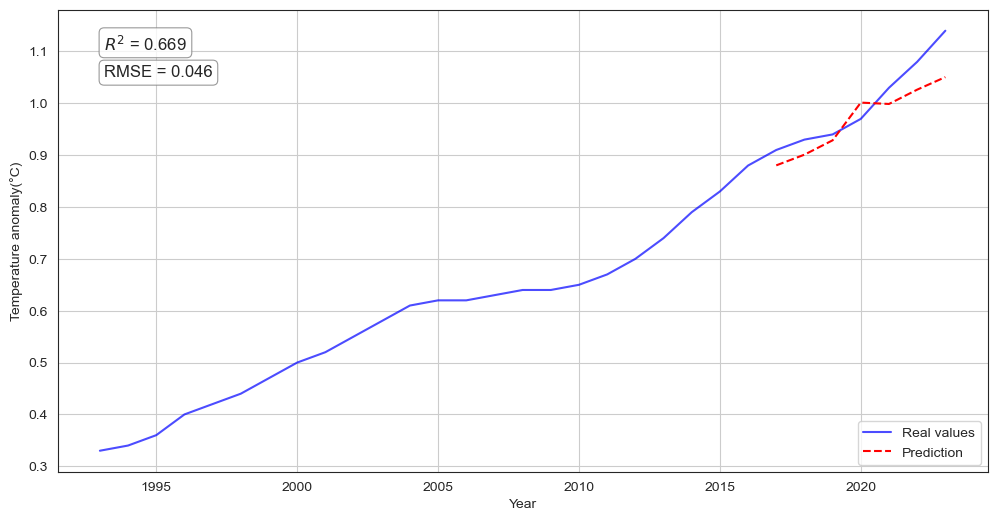

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df_comb['Year'], y, label='Real values', color='blue', alpha=0.7)
plt.plot(X_test['Year'], y_pred_simple, label='Prediction', color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Temperature anomaly(°C)')
plt.legend()
plt.grid(True)
plt.text(0.05, 0.95, f'$R^2$ = {r2_simple:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.8, alpha=0.8))
plt.text(0.05, 0.88, f'RMSE = {rmse_simple:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.8, alpha=0.8))
plt.show()

In [36]:
# Vamos a crear otro modelo predictivo pero en este caso relacionando la temperatura y el nivel del mar. 

In [57]:
X = df_comb[['Annual_Anomaly_Lowess_C', 'Year']]
y = df_comb['GMSL mean']

split_point2 = int(len(df_comb) * 0.8)

X_train, X_test = X[:split_point2], X[split_point2:]
y_train, y_test = y[:split_point2], y[split_point2:]

model_simple2 = LinearRegression()
model_simple2.fit(X_train, y_train)

#Evaluamos el modelo 
y_pred_simple2 = model_simple2.predict(X_test)

rmse_simple2 = np.sqrt(mean_squared_error(y_test, y_pred_simple2))
r2_simple2 = r2_score(y_test, y_pred_simple2)

print(f"\n--- Evaluación del Modelo de Regresión Lineal ---")
print(f"RMSE (Error Cuadrático Medio): {rmse_simple2:.3f}")
print(f"R-cuadrado: {r2_simple2:.3f}")
print(f"Coeficiente para Anomalia de temperatura: {model_simple2.coef_[0]:.3f}")
print(f"Coeficiente para Año: {model_simple2.coef_[1]:.3f}")
print(f"Intercepto: {model_simple2.intercept_:.3f}")


--- Evaluación del Modelo de Regresión Lineal ---
RMSE (Error Cuadrático Medio): 2.371
R-cuadrado: 0.913
Coeficiente para Anomalia de temperatura: 67.853
Coeficiente para Año: 1.574
Intercepto: -3192.798


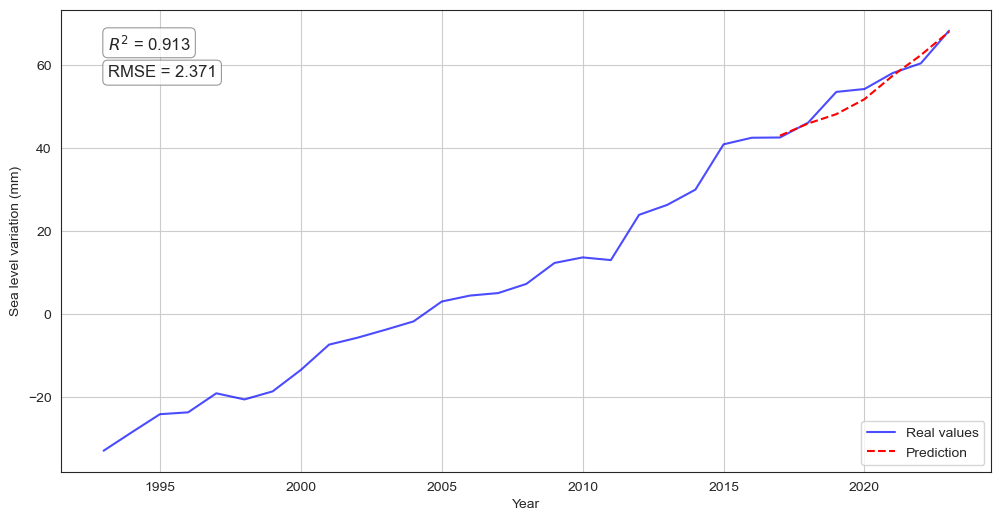

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(df_comb['Year'], y, label='Real values', color='blue', alpha=0.7)
plt.plot(X_test['Year'], y_pred_simple2, label='Prediction', color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Sea level variation (mm)')
plt.legend()
plt.grid(True)
plt.text(0.05, 0.95, f'$R^2$ = {r2_simple2:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.8, alpha=0.8))
plt.text(0.05, 0.88, f'RMSE = {rmse_simple2:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.8, alpha=0.8))
plt.show()

In [51]:
#Creamos el último modelo predictivo, esta vez nivel del mar con respecto a CO2
X = df_comb[['Annual CO₂ emissions (per capita)', 'Year']]
y = df_comb['GMSL mean']

split_point3 = int(len(df_comb) * 0.8)

X_train, X_test = X[:split_point3], X[split_point3:]
y_train, y_test = y[:split_point3], y[split_point3:]

model_simple3 = LinearRegression()
model_simple3.fit(X_train, y_train)

#Evaluamos el modelo 
y_pred_simple3 = model_simple3.predict(X_test)

rmse_simple3 = np.sqrt(mean_squared_error(y_test, y_pred_simple3))
r2_simple3 = r2_score(y_test, y_pred_simple3)

print(f"\n--- Evaluación del Modelo de Regresión Lineal ---")
print(f"RMSE (Error Cuadrático Medio): {rmse_simple3:.3f}")
print(f"R-cuadrado: {r2_simple3:.3f}")
print(f"Coeficiente para niveles de CO2: {model_simple3.coef_[0]:.3f}")
print(f"Coeficiente para Año: {model_simple3.coef_[1]:.3f}")
print(f"Intercepto: {model_simple3.intercept_:.3f}")


--- Evaluación del Modelo de Regresión Lineal ---
RMSE (Error Cuadrático Medio): 2.645
R-cuadrado: 0.891
Coeficiente para niveles de CO2: -14.748
Coeficiente para Año: 3.614
Intercepto: -7178.533


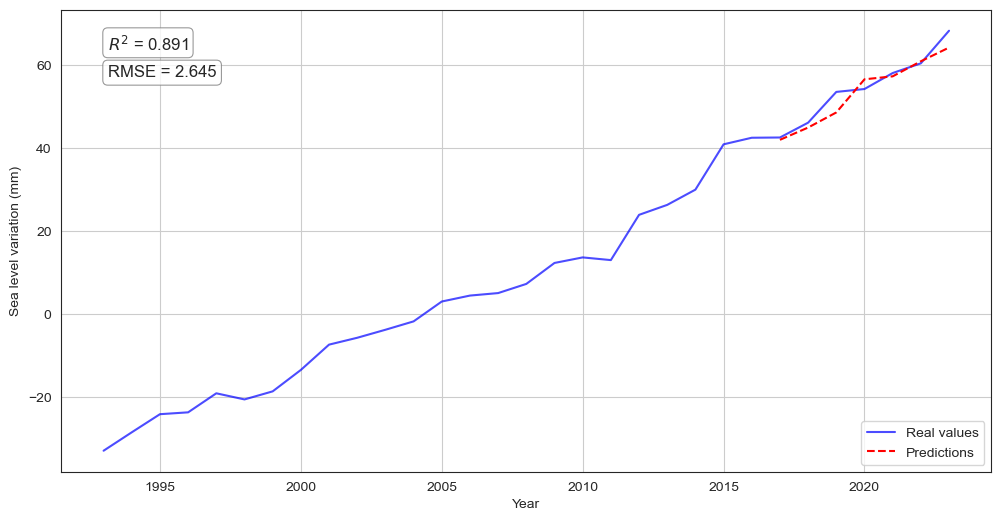

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(df_comb['Year'], y, label='Real values', color='blue', alpha=0.7)
plt.plot(X_test['Year'], y_pred_simple3, label='Predictions', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Sea level variation (mm)')
plt.legend()
plt.grid(True)
plt.text(0.05, 0.95, f'$R^2$ = {r2_simple3:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.8, alpha=0.8))
plt.text(0.05, 0.88, f'RMSE = {rmse_simple3:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.8, alpha=0.8))
plt.show()

In [ ]:
# Volvemos a tener un modelo bueno, una R2 alta y un error cuadratico bajo comparado con los valores que muestra el df.

In [69]:
# Vamos a utilizar ahora un modelo más avanzado para ver si podemos explicar más con él. En este caso usaremos Prophet.
from prophet import Prophet #Si nos da error, debemos instalar prophet en !pip

# Vamos a crear una copia del df.
df_prophet = df_comb[['Year', 'GMSL mean', 'Annual CO₂ emissions (per capita)']].copy()
# Prophet necesita una columna llamada ds (que es el datatime) y otra con la variable a predecir 'y'.
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'GMSL mean': 'y'})
# Como hemos realizado la media para cada año, no tenemos una fecha concreta, asumiremos el 1 de enero para cada año.
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'].astype(str) + '-01-01')
print("DataFrame preparado para Prophet (primeras filas):")
print(df_prophet.head())



DataFrame preparado para Prophet (primeras filas):
          ds          y  Annual CO₂ emissions (per capita)
0 1993-01-01 -32.842973                           4.069678
1 1994-01-01 -28.405135                           4.051227
2 1995-01-01 -24.041081                           4.086227
3 1996-01-01 -23.594167                           4.152334
4 1997-01-01 -19.008108                           4.118613


In [71]:
# Usaremos aproximadamente el 80% para entrenamiento y el 20% para prueba.
split_point_prophet = int(len(df_prophet) * 0.8)
df_train_prophet = df_prophet.iloc[:split_point_prophet]
df_test_prophet = df_prophet.iloc[split_point_prophet:]

model_prophet = Prophet(
    growth='linear', #Vamos a usar linal porque los datos de la variable dependiente es lineal, si fuesen exponenciales usariamos tambien lineal pero conviertiendo los datos exponenciales a lineales. Si los logisticos (forma de S con saturacion o limite) si se usa logistic.
)

# Añadir el regresor exógeno (CO2 per cápita)
model_prophet.add_regressor('Annual CO₂ emissions (per capita)')

# Entrenar el modelo
model_prophet.fit(df_train_prophet)

15:30:03 - cmdstanpy - INFO - Chain [1] start processing
15:30:04 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
# Primero, generamos un DataFrame con las fechas para las que queremos predecir (set de prueba + futuro).
# Prophet tiene una función make_future_dataframe, pero para incluir regresores exógenos, es más fácil construirlo manualmente y luego añadir los valores del regresor.

# Años de prueba del df_final para el conjunto de prueba
# NOTA IMPORTANTE: Si estás usando 'df_comb' en tu entorno, asegúrate de que sea la variable correcta.
# En mi código anterior usé 'df_final'. Revisa cuál es el nombre de tu DataFrame principal.
# Asumo que en tu código real es 'df_comb' por el traceback.
test_years_df = df_comb[['Year', 'Annual CO₂ emissions (per capita)']].iloc[split_point_prophet:].copy()
test_years_df = test_years_df.rename(columns={'Year': 'ds'})
test_years_df['ds'] = pd.to_datetime(test_years_df['ds'].astype(str) + '-01-01')


# Años futuros más allá de tus datos existentes (ej. los próximos 10 años)
# CORRECCIÓN AQUÍ: Construir la columna 'ds' de una manera que evite el error de concatenación de ufunc
start_year_future = df_comb['Year'].max() + 1
end_year_future = df_comb['Year'].max() + 11 # hasta 10 años más
future_years_list = [f"{year}-01-01" for year in range(start_year_future, end_year_future)]

future_years_range = pd.DataFrame(
    {'ds': pd.to_datetime(future_years_list)}
)


# Para poder predecir con el regresor 'Annual CO₂ emissions (per capita)',
# necesitamos estimar sus valores para estos años futuros.
# Opción simple: Proyectar el último valor conocido de CO2 per cápita
# En un proyecto real, se podría usar un modelo para CO2, un escenario, etc.
last_known_co2_per_capita = df_comb['Annual CO₂ emissions (per capita)'].iloc[-1]
future_years_range['Annual CO₂ emissions (per capita)'] = last_known_co2_per_capita


# Combinar los años de prueba y los años futuros para el DataFrame de predicción
future_df_prophet = pd.concat([test_years_df, future_years_range]).reset_index(drop=True)

print("\nDataFrame Futuro para predicciones (primeras filas con CO2 proyectado):")
print(future_df_prophet.head())
print("-" * 50)



DataFrame Futuro para predicciones (primeras filas con CO2 proyectado):
          ds  Annual CO₂ emissions (per capita)
0 2017-01-01                           4.707258
1 2018-01-01                           4.751732
2 2019-01-01                           4.750081
3 2020-01-01                           4.453724
4 2021-01-01                           4.650446
--------------------------------------------------


In [75]:
# --- 5. Realizar Predicciones ---
forecast = model_prophet.predict(future_df_prophet)


In [77]:
# Extraer las predicciones correspondientes al conjunto de prueba
forecast_test_prophet = forecast[forecast['ds'].isin(df_test_prophet['ds'])]

# Asegurarse de que las series estén alineadas para la evaluación
y_true_prophet = df_test_prophet['y'].reset_index(drop=True)
y_pred_prophet = forecast_test_prophet['yhat'].reset_index(drop=True)

rmse_prophet = np.sqrt(mean_squared_error(y_true_prophet, y_pred_prophet))
r2_prophet = r2_score(y_true_prophet, y_pred_prophet)

print(f"\n--- Evaluación del Modelo Prophet en Set de Prueba ---")
print(f"RMSE (Error Cuadrático Medio): {rmse_prophet:.3f}")
print(f"R-cuadrado: {r2_prophet:.3f}")



--- Evaluación del Modelo Prophet en Set de Prueba ---
RMSE (Error Cuadrático Medio): 2.740
R-cuadrado: 0.884


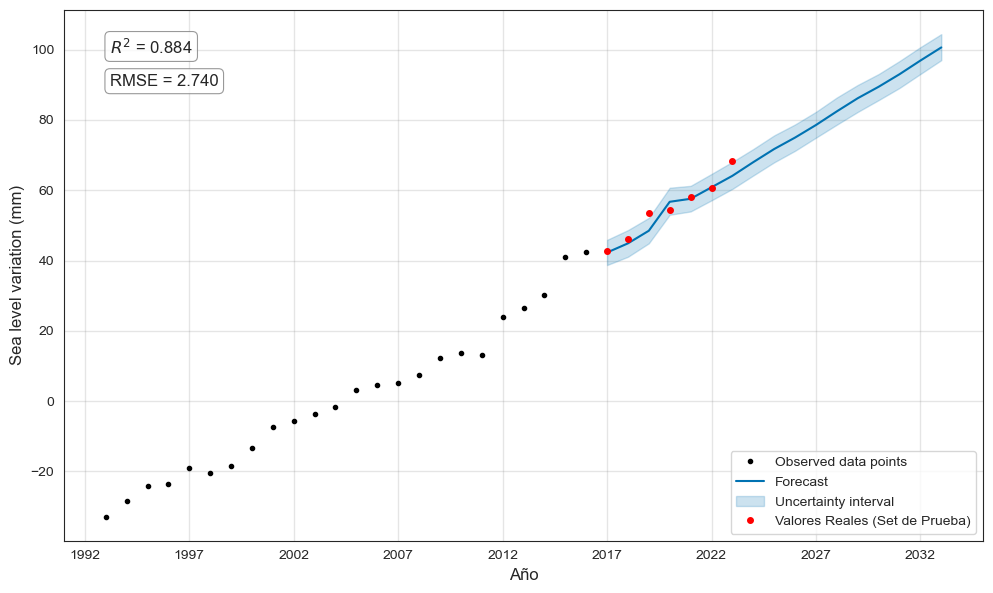

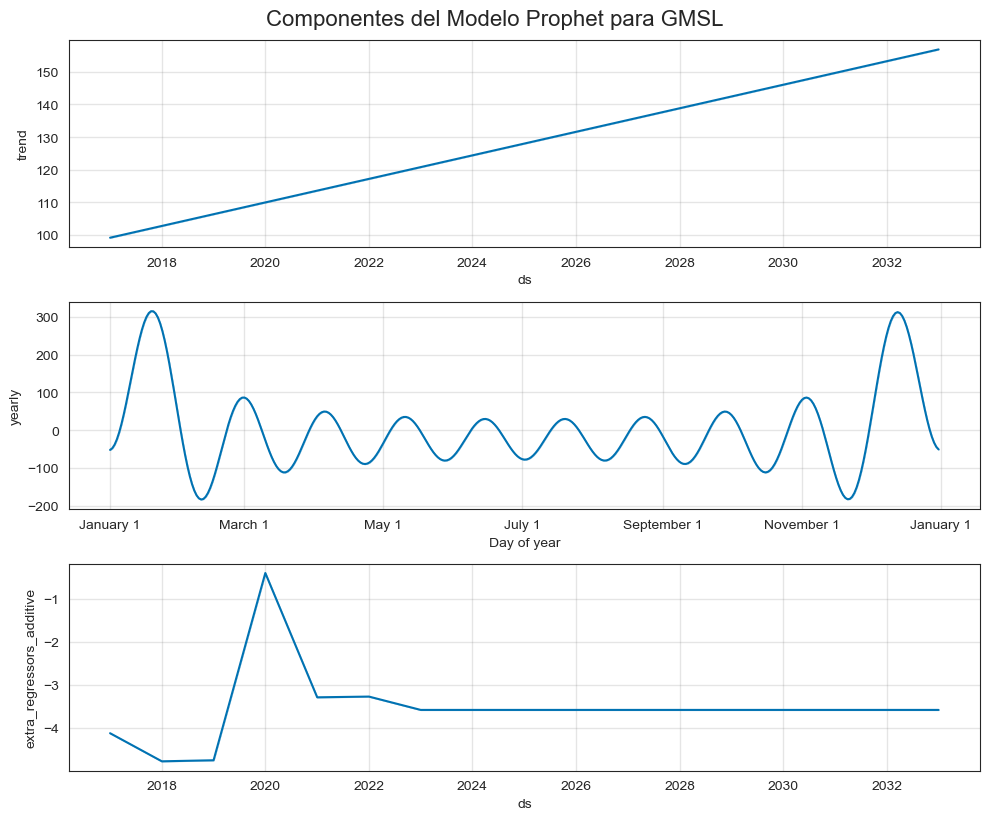

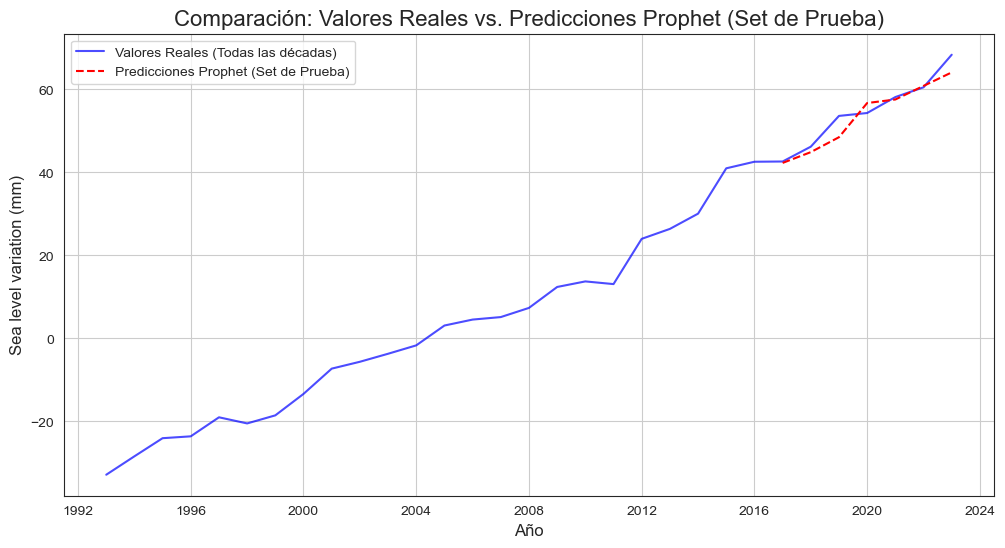

In [89]:
# --- 7. Visualizar Predicciones de Prophet ---
# Plot general del modelo y sus componentes
fig1 = model_prophet.plot(forecast, figsize=(10, 6))
plt.xlabel('Año', fontsize=12)
plt.ylabel('Sea level variation (mm)', fontsize=12)
plt.grid(True)
plt.text(0.05, 0.95, f'$R^2$ = {r2_prophet:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.8, alpha=0.8))
plt.text(0.05, 0.88, f'RMSE = {rmse_prophet:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.8, alpha=0.8))
# Añadir los puntos reales del set de prueba para una comparación más clara
plt.plot(df_test_prophet['ds'], df_test_prophet['y'], 'ro', markersize=4, label='Valores Reales (Set de Prueba)')
plt.legend()
plt.show()


# Visualizar los componentes del modelo (tendencia, regresores, etc.)
fig2 = model_prophet.plot_components(forecast, figsize=(10, 8))
plt.suptitle('Componentes del Modelo Prophet para GMSL', y=1.02, fontsize=16)
plt.show()

# Para una comparación más detallada del set de prueba
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Valores Reales (Todas las décadas)', color='blue', alpha=0.7)
plt.plot(forecast_test_prophet['ds'], forecast_test_prophet['yhat'], label='Predicciones Prophet (Set de Prueba)', color='red', linestyle='--')
plt.title('Comparación: Valores Reales vs. Predicciones Prophet (Set de Prueba)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Sea level variation (mm)', fontsize=12)
plt.legend()

plt.grid(True)
plt.show()
